<a href="https://colab.research.google.com/github/NayanaPradeep/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM**

##  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. 

## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. 

##  Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

# **SOLUTION**

## **OVERVIEW**

In 2007 Brian Chesky and Joe Gebbia were broke and looking to raise money to make their rent in San Francisco. They decided to rent out air mattresses in their apartment to attendees of a conference because all the hotels were booked. They called their service “Air Bed and Breakfast.” In a few years, this small experiment would create the hotel industry disruptor Airbnb. The privately held company, with third co-founder Nathan Blecharczyk on board, now lists more than three million lodgings in nearly 200 countries.

(source: https://knowledge.wharton.upenn.edu/article/the-inside-story-behind-the-unlikely-rise-of-airbnb/)

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.


##**IMPORTING THE LIBRARIES**

In [1]:
#importing necessary libraries for the dataset analysis
import numpy as np                                            # Computation on datasets
import pandas as pd                                           # Data processing, analysing and wrangling
import matplotlib.pyplot as plt                               # Data visualization --plotting
import matplotlib.image as mpimg                              # Data visualization --images
%matplotlib inline                                            
import seaborn as sns                                         # Data visualization --plotting

##**MOUNT THE DRIVE**

In [2]:
#Mount the drive to load the dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**IMPORT THE DATASET**

In [3]:
# Read the Airbnb NYC 2019 dataset to start analyzing
file_path = '/content/drive/MyDrive/Colab Notebooks/Airbnb Bookings Analysis - Nayana Pradeep/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

##**ANALYZING THE DATA**

In [4]:
#Check the number of rows and columns in the dataset
airbnb_df.shape

(48895, 16)

In [5]:
#Total number of elements in the dataset
airbnb_df.size

782320

In [6]:
#Find the columns and datatypes in the dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Checking if the id is unique or not
airbnb_df['id'].nunique()

48895

In [8]:
#Check some of the contents using head and tail functions
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
airbnb_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [42]:
#Types of room available
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [43]:
#Total number of neighbouhood listed in the dataset
airbnb_df.neighbourhood.nunique()

221

We can conclude the below details about the data from the primary checks performed above



 Below is a description of the columns/variables in Airbnb NYC data 

* id                                          ----Unique Listing ID             
* name                                        ----Listing Name 
* host_id                                     ----Host ID
* host_name                                   ----Host Name 
* neighbourhood_group                         ----Location
* neighbourhood                               ----Area.There are 221 unique neighbourhoods
* latitude                                    ----Latitude coordinates
* longitude                                   ----Longitude coordinates
* room_type                                   ----Type of room. Available types are Private room,Entire home/apt and Shared room
* price                                       ----Price 
* minimum_nights                              ----Minimum number of nights for which the booking is possible
* number_of_reviews                           ----Total number of reviews
* last_review                                 ----Latest review
* reviews_per_month                           ----Number of reviews per month on an average. Hence this isof a floating point datatype
* calculated_host_listings_count              ----Number of listings per host
* availability_365                            ----Number of days for which the listing is available for booking





In [41]:
#Descriptive Statistic Summary
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



From the above statistics we can note the below points

1.   The mean price of rooms is **157 dollars**.The maximum price of a room is **10000 dollars**.
2.   On an average people spend 7 days in rooms.Surprisingly, there are listings available with minimum stay for more than an year .The maximum values for minimum_nights stay is **1250** which approximately is 3 and a half years
3.   Maximum number of reviews received by a listing is **629**.
4.   There are certain listings with availability_365 as 0. This could either indicate that those listings are temporarily unavailable or bad data.





We have a column 'calculated_host_listings_count' for tracking the number of listings for each host. Does this mean we have  'calculated_host_listings_count' number of rows for corresponding hosts ? Lets find out.



As the first step, lets consider the 'calculated_host_listings_count' and find which host has 'calculated_host_listings_count' at its maximum.

In [13]:
#Copy the host_id and calculated_host_listing_count column to another data set and sort it descending order of calculated_host_listing_count
calculated_host_listing=airbnb_df[['host_id', 'calculated_host_listings_count']].sort_values('calculated_host_listings_count',ascending=False)

#Remove all the duplicates to make the dataframe simpler
calculated_host_listing.drop_duplicates()

,host_id,calculated_host_listings_count
39773,219517861,327
38701,107434423,232
13039,30283594,121
42840,137358866,103
33464,12243051,96
...,...,...
18593,91292951,1
18594,91381742,1
18595,12061634,1
18596,91393670,1


Next step is to find the number of rows with listing details are available for each host. We can easily find this by using the value_counts function

In [14]:
#Find the number of records with each host_id 
airbnb_df["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

It is clear from the last two same outputs that the 'calculated_host_listings_count' keep track of the number of listings for each of the host.This would mean that the calculated_host_listings_count would be same for a particular host irrespective of the other attributes.

Now that it is confirmed that we can easily use the calculated_host_listings_count to check the number of listings for each host, lets do that.

From above outputs , we can see that host_id 219517861 has the maximum number of listings which is 327

In [15]:
#airbnb_df[airbnb_df["calculated_host_listings_count"]==219517861]
airbnb_df[airbnb_df["calculated_host_listings_count"]==airbnb_df["calculated_host_listings_count"].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


**Sonder (NYC)** is the host with maximum listings. 

## **HANDLING NULL VALUES** 

For further analysis, we need to make sure that we have considered the situations where there is null/nan/missing values.


In [16]:
#Find the number of columns with null value for each column
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
#Total number of null values in the dataset
airbnb_df.isna().sum().sum()

20141

There are 4 columns with null values.
*   name
*   host_name                      
*   last_review                       
*   reviews_per_month                 

As reviews_per_month is a supposed to be a numerical value ,we can replace the null values in that column with 0

In [18]:
airbnb_df['reviews_per_month'].fillna(0,inplace = True)

Both name and host_name with null values can be replaced as 'NAME' and 'HOST NAME respectively

In [19]:
airbnb_df['name'].fillna('NAME',inplace = True)
airbnb_df['host_name'].fillna('HOST NAME',inplace = True)

As 'last_review' just provides the last date of the review and has more than 10000 null vales and least likely to affect the analysis, we will drop the table .

In case if we have to revisit this column, we will keep a copy of the dataframe in another before dropping the 'last_review' column

In [20]:
#Keeping a copy of  dataset with all the columns
airbnb_df_copy =airbnb_df.copy()

#Drop last_review column
airbnb_df.drop(['last_review'],axis=1,inplace=True)

Let's confirm that the changed dataframe doesnt have any null/missing values

In [21]:
#Checking if there are any null values in the dataframe
airbnb_df.isnull().values.any()

False

## **CORRELATION HEATMAP**

It's time to find out the correlation trend of the dataset


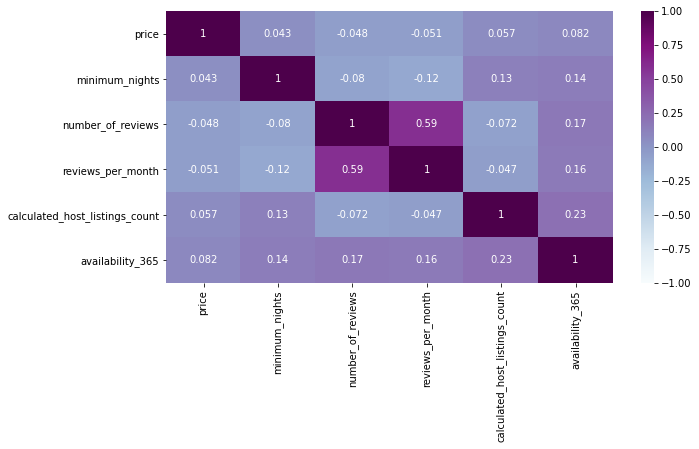

In [22]:
#Creating a new dataframe with relevant numerical values  for checking the correlation
corr_df = airbnb_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']]
plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(), vmin=-1, cmap='BuPu', annot=True)

From the above heatmap, we can conclude the below points

1.   Price of the listing is negatively correlated to both number of reviews and reviews per month which means that the reviews decreases as the price increases
2.   Reviews are also impacted by minimum_night.Less the minimum nights available for booking more the reviews

3.   Availability_365 is positively correlated to calculated_host_listing_count.It shows that hosts with more listings tend to be available for more days in a year

4.   No_of_reviews and reviews_per_month are approximately affected the same way with respect to the other attributes.




## **DATA VISUALIZATION**

In [23]:
#Number of listings for each neighbourhood group
neighbourhood_host_listings=airbnb_df["neighbourhood_group"].value_counts()
neighbourhood_host_listings

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Area/Number of Listings')

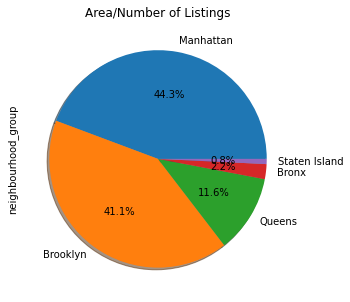

In [24]:
#Plot a piechart for the area and number of listings for each area
ax=airbnb_df['neighbourhood_group'].value_counts().plot(kind='pie',figsize=(10, 5),autopct='%1.1f%%',shadow=True)
ax.set_title('Area/Number of Listings')

**Manhattan and Brooklyn** have the highest number of listings whereas Staten Island has the least

Let's delve into the latitude and longitude aspects of the listings now.

Text(0.5, 1.0, 'Area Listings Distribution')

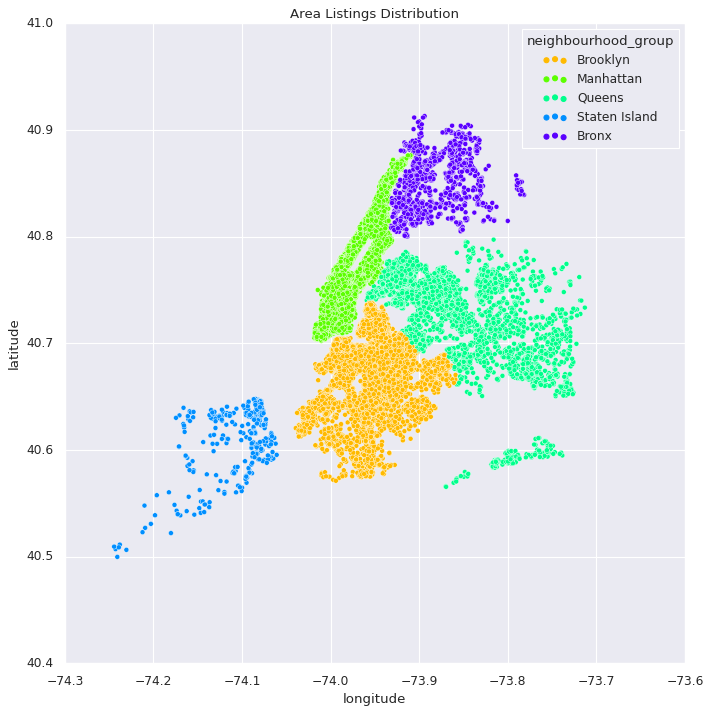

In [44]:
sns.set(rc={"figure.figsize": (10, 10)})
ax= sns.scatterplot(data=airbnb_df, x="longitude", y="latitude",hue='neighbourhood_group',palette='gist_rainbow')
ax.set_title('Area Listings Distribution')

Text(0.5, 1.0, 'Room Type Distribution')

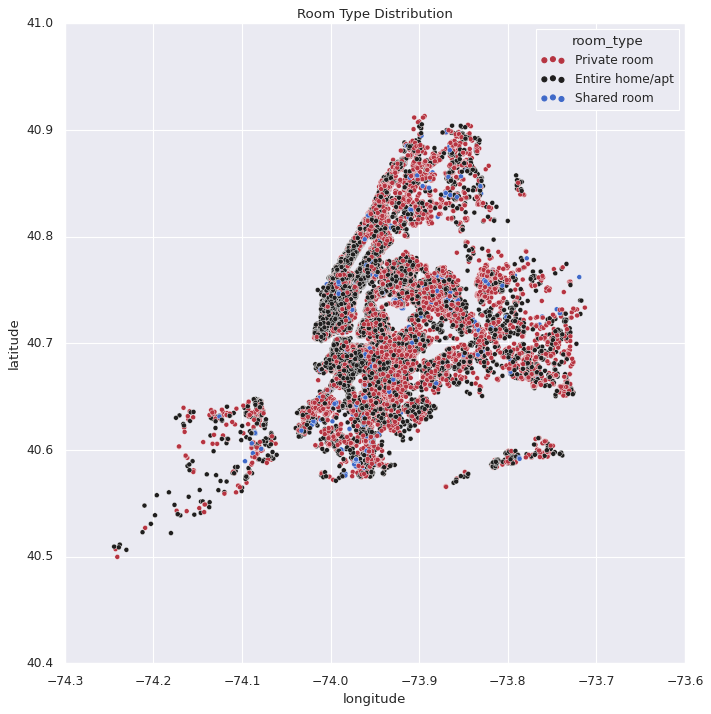

In [45]:
sns.set(rc={"figure.figsize": (10, 10)})
ax= sns.scatterplot(data=airbnb_df, x="longitude", y="latitude",hue='room_type',palette='icefire_r')
ax.set_title('Room Type Distribution')

**Shared rooms** are less in demand by a big margin as we can see from the above scatterplot.


Most of the listings are for **Private room or an entire apartment**.

When it comes to select any listing, cost is a very important factor. It's time to compare each area with respect to the price

Text(0.5, 1.0, 'Distribution of prices for each area')

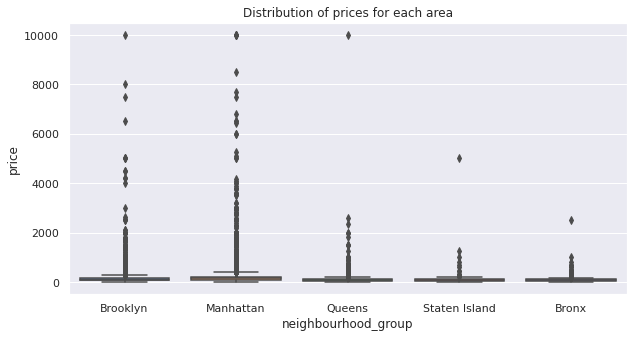

In [27]:
area_price_relation=sns.boxplot(data=airbnb_df, x='neighbourhood_group', y='price')
area_price_relation.set_title('Distribution of prices for each area')


Ohh no!!! There are really high prices in the dataset causing the boxplot to be pushed down. Let's fix this.


Prices above 300 can be considered as outliers here.
Outliers are the observations that diverges from an overall pattern on a sample.

Let's test this theory using a displot.


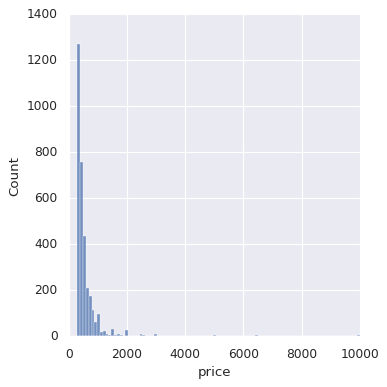

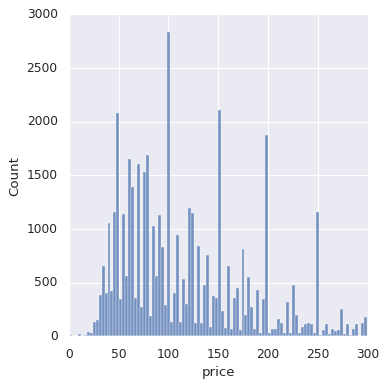

In [47]:
sns.displot(airbnb_df[airbnb_df.price>300].price,bins=100)
sns.displot(airbnb_df[airbnb_df.price<300].price,bins=100)


It's evident that the price range above 300 are outliers.

Lets remove these outliers by taking the subset of the dataframe where the price is below 300 and make a boxplot on it.

Text(0.5, 1.0, 'Distribution of prices for each area')

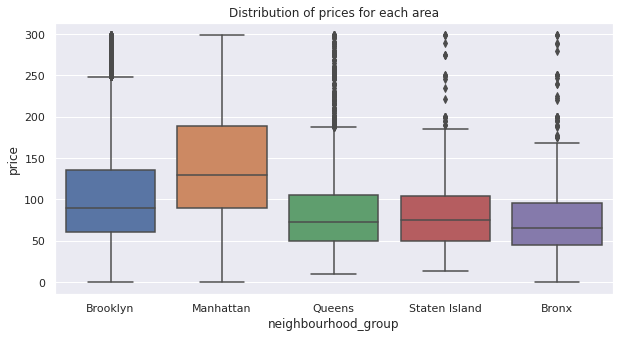

In [29]:
df_price=airbnb_df[airbnb_df.price < 300]
area_price_relation=sns.boxplot(data=df_price, x='neighbourhood_group', y='price')
area_price_relation.set_title('Distribution of prices for each area')

Yes!!. Now we have a much clearer picture


**Manhattan** bags another title for the most expensive neighbourhood area.<br>
Price range for the **Bronx** listings are the lowest.

Prices of the hotels can be categorised as cheap, medium and expensive.
Lets put these prices in these boxes and see the statistics.

In [48]:
def price_type(listing_price):
    if listing_price<=100:
        return 'Cheap'
    elif listing_price >100 and listing_price<=300:
        return 'Medium'
    else:
        return 'Expensive'

Here , we have considered thelisting prices in 3 categories as per below conditions.


*   If the listing price is below 100 , it is considered as cheap
*   If the listing price is in the range of 0 to 300, then it is medium
*   if it is above 300, it is an expensive listing





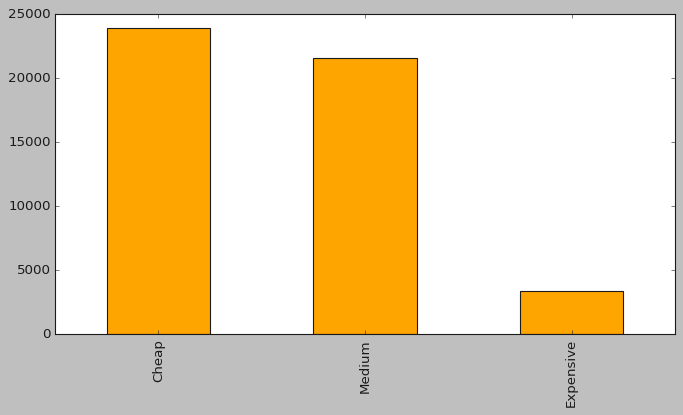

In [88]:
plt.figure(figsize=(10,5))
airbnb_df['price'].apply(price_type).value_counts().plot(kind='bar',color='orange');

Now we know that most of the listings have their price range between 0 to 300

Lets find out the neighbourhood relation with mean price.
First, we need to get the average price for each neighbourhood.
From earlier analysis, we know that there are 221 unique neighbourhoods

In [51]:
#Find the mean price for each neighbourhood and make it into a dataframe
top_prices_neighbourhood = airbnb_df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

In [33]:
top_prices_neighbourhood

,neighbourhood,price
0,Bull's Head,47.333333
1,Hunts Point,50.500000
2,Tremont,51.545455
3,Soundview,53.466667
4,New Dorp,57.000000
...,...,...
216,Riverdale,442.090909
217,Sea Gate,487.857143
218,Tribeca,490.638418
219,Woodrow,700.000000


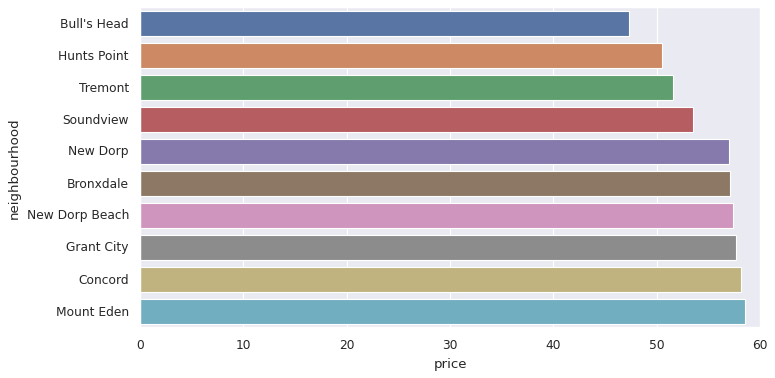

In [53]:
#Comparing the top 10 (average) cheap neighbourhoods
plt.figure(figsize=(10,5))
sns.barplot(y="neighbourhood", x="price", data=top_prices_neighbourhood.head(10))

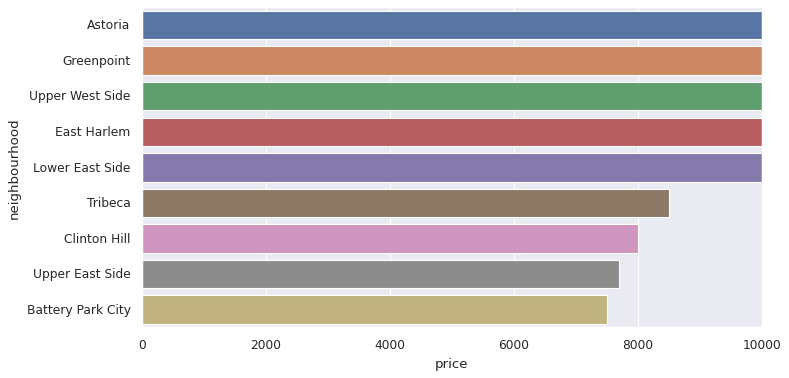

In [54]:
#Top 10 expensive neighbourhoods
plt.figure(figsize=(10,5))
sns.barplot(y="neighbourhood", x="price", data=airbnb_df.nlargest(10,['price']))

Next, we can start analyzing the reviews part of the dataset.


Text(0.5, 1.0, 'Room Type v/s Reviews in each Area')

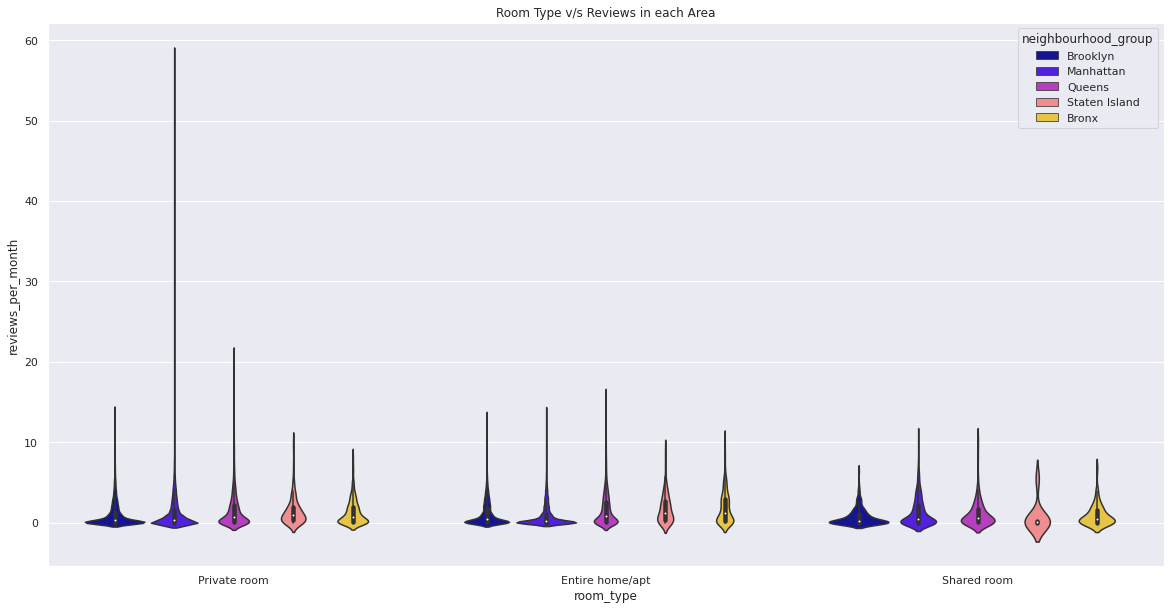

In [37]:
f,ax = plt.subplots(figsize=(20,10))
ax= sns.violinplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=airbnb_df,palette='gnuplot2')
ax.set_title('Room Type v/s Reviews in each Area')

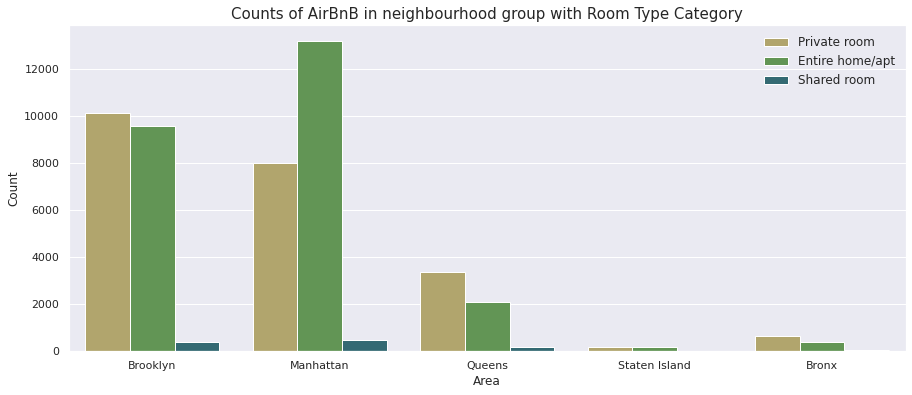

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(data=airbnb_df, x='neighbourhood_group', hue='room_type', palette='gist_earth_r')
plt.title('Counts of AirBnB in neighbourhood group with Room Type Category', fontsize=15)
plt.xlabel('Area')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

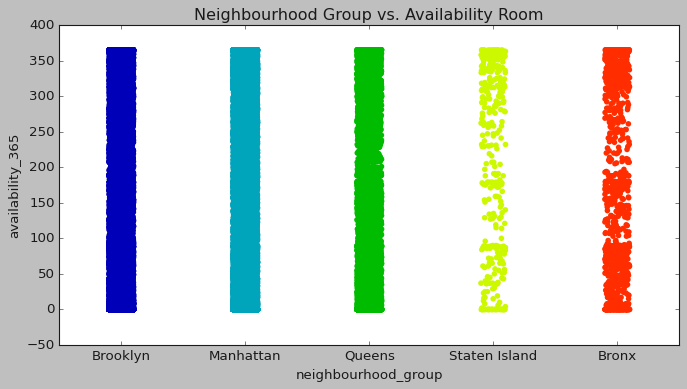

In [62]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group vs. Availability Room")
sns.stripplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette="nipy_spectral")
plt.show()

Staten Island has the least density when it comes to the availability of listings through the year.The fact that Staten Island has the least number of listings could also be contributing to this.

<Figure size 800x400 with 0 Axes>

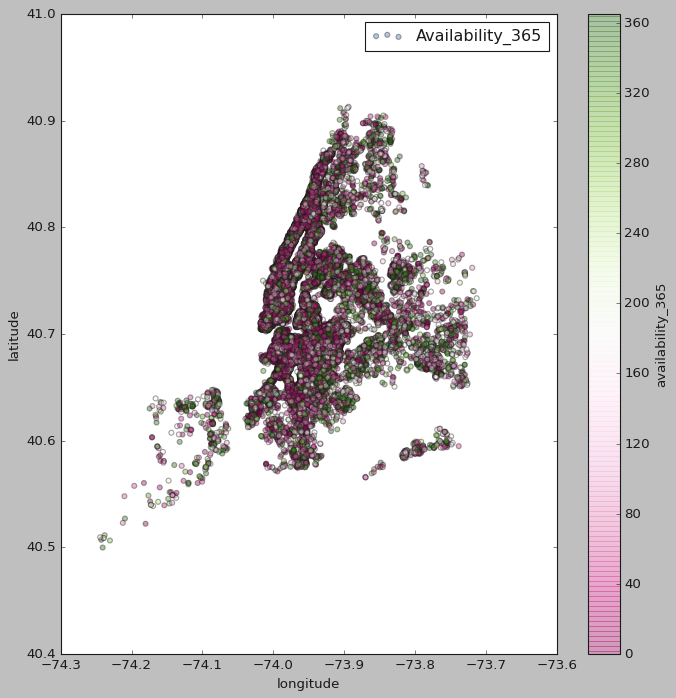

In [77]:
plt.figure(figsize=(10,5));
plt_1=df_price.plot(kind='scatter', x='longitude',y='latitude',label='Availability_365',c='availability_365',cmap=plt.get_cmap('PiYG'),colorbar=True,alpha=0.4,figsize=(10,10));
plt_1.legend();

Green dots on the map shows the places where the listings are available throughout the year.

Text(0.5, 0, 'Price')

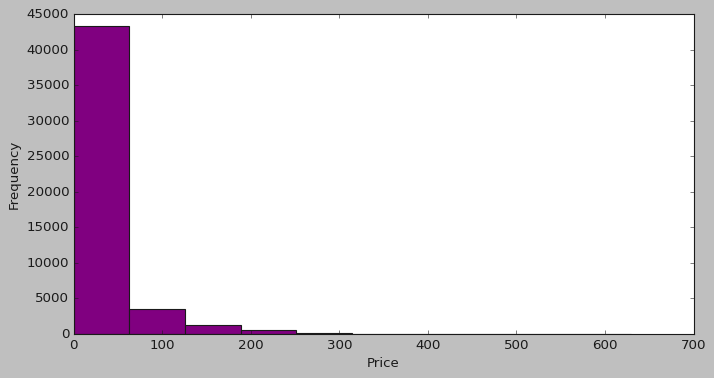

In [87]:
plt.figure(figsize=(10,5))
airbnb_df['number_of_reviews'].plot(kind='hist',color='purple')
plt.xlabel("Price")

The most number of reviews are for the listings with less price(range from 0 to 50 $ )

In [93]:
max_Reviews=airbnb_df.sort_values(by=['number_of_reviews'],ascending=False).head(25)
max_Reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


It's interesting that most of the listing's name in the above list is not actually a name. It is more like a description of the listing. Also most listings has their minimum_nights as low as 1 or 2.